# Lab 11 (3/30): Text Data

### Web pages
Course page: https://ambujtewari.github.io/teaching/STATS306-Winter2020/

Lab page: https://rogerfan.github.io/stats306_w20/

### Office Hours
    Mondays: 2-4pm, USB 2165
    
### Contact
    Questions on problems: Use the slack discussions
    If you need to email me, include in the subject line: [STATS 306]
    Email: rogerfan@umich.edu

In [42]:
require(tidyverse)
require(stringr)
require(lubridate)

Loading required package: lubridate


Attaching package: ‘lubridate’


The following object is masked from ‘package:base’:

    date




## Review

You can use https://regex101.com/ to test and develop regexs on example text. Remember that when you transfer them into `R`, you need replace replace every backslash with two, so replace `/` with `//` to escape them for `R`.

### Special characters

Regex takes advantage of several reserved characters that are used for special functions. 

`. \ | ( ) [ ] ^ $ { } * + ?`

### Character classes

* `.` matches anything (wildcard)
* `[aeiou]` matches a single character in the set provided
* `[^aeiou]` matches a single character NOT in the set
* `[a-e]` matches a range, equivalent to `[abcde]`

#### Shorthand

* `\w` matches a "word" character, equivalent to `[a-zA-Z0-9_]`
* `\s` matches any whitespace, including tabs and newlines
* `\d` matches digits, equivalent to `[0-9]`
* `\W`, `\S`, and `\D` match the opposite of the lower-case versions

#### Special characters

* Note that `\t` and `\n` match the tab and newline characters. 
* If you want the "literal" versions of any of the reserved characters, you will need to escape them with a backslash `\`, e.g. `[\.\\\|]`


### Grouping

* `()` are used to group patterns together. This can be used with any of the below operators. This can also be used to extract portions of a regex out individually, which we will later learn.
* `\1`, `\2`, etc. refers to the first, second, etc. group in the match.

### Operators

* `|` is the OR operator and allows matches of either side
* `{}` describes how many times the preceeding character of group must occur:
  * `{m}` must occur exactly `m` times
  * `{m,n}` must occur between `m` and `n` times, inclusive
  * `{m,}` Must occur at least `m` times
* `*` means the preceeding character can appear zero or more times, equivalent to `{0,}`
* `+` means the preceeding character must appear one or more times, equivalent to `{1,}`
* `?` means the preceeding character can appear zero or one time, equivalent to `{0,1}`

### Anchors

* `^` matches the start of a string (or line)
* `$` matches the end of a string (or line)
* `\b` matches a word "boundary"
* `\B` matches not word boundary

## Exercise Solutions

Given the corpus of common words in `stringr::words`, create regular expressions that find all words that:

- Start with `y` (I've done this one for you)
- End with `x`
- Are exactly two letters long (don’t cheat by `using str_length`!)
- Have ten letters or more

In [2]:
words = stringr::words

In [53]:
words[str_detect(words, "^y\\w*")]

[1] "year"      "yes"       "yesterday" "yet"       "you"       "young"

In [4]:
words[str_detect(words, "\\w*x$")]

[1] "box" "sex" "six" "tax"

In [6]:
words[str_detect(words, "^[a-z]{2}$")]

[1] "as" "at" "be" "by" "do" "go" "he" "if" "in" "it" "no" "of" "on" "or" "so"
[16] "to" "up" "we"

In [7]:
words[str_detect(words, "^[a-z]{10,}")]

[1] "appropriate" "department"  "difference"  "environment" "experience" 
 [6] "individual"  "opportunity" "particular"  "photograph"  "responsible"
[11] "television"  "understand"  "university"

Create regular expressions to find all words that:

- End with `ed`, but not with `eed`
- End with `ing` or `ise`
- End with the same two-letter sequence they start with (e.g. `church`)
- Empirically verify the rule "i before e except after c" (use multiple patterns to check this)

In [128]:
words[str_detect(words, "[^e]ed$")]

HTML widgets cannot be represented in plain text (need html)

In [129]:
words[str_detect(words, "(ing|ise)$")]

HTML widgets cannot be represented in plain text (need html)

In [134]:
words[str_detect(words, "^(\\w{2})\\w*\\1$")]

HTML widgets cannot be represented in plain text (need html)

In [8]:
words[str_detect(words, "ie")]
words[str_detect(words, "[^c]ei")]
words[str_detect(words, "cei")]

[1] "achieve"    "believe"    "brief"      "client"     "die"       
 [6] "experience" "field"      "friend"     "lie"        "piece"     
[11] "quiet"      "science"    "society"    "tie"        "view"

[1] "weigh"

[1] "receive"

## Managing Data

The file `reddit_dirty.txt` contains a dataset of reddit comments. To see the first few lines, we can use the command:

In [13]:
posts1 = tibble(
    var1 = read_lines(
        'https://raw.githubusercontent.com/rogerfan/stats306_w20/master/labs/reddit_dirty.txt'
    ))

head(posts1, 10)

var1
<chr>
postid: 1
https://www.reddit.com/user/br_shadow
"Comment: Thank you for this, there is a person writing to me through facebook that's my only point of communication. He also sent me this, is there maybe a website to check its authenticity ? I was unable to find any lists of registered foundations in Uganda https://scontent-syd2-1.xx.fbcdn.net/v/t34.0-12/25589975_2043006685934965_29416957_n.jpg?oh=088ca5a5d027b9c7f243b2bbcb0261f4&amp;oe=5A430D87"
2017-12-25 15:49:08
postid: 2
https://www.reddit.com/user/Ksalol
"Comment: They are not to quick actually. It's mainly the Fentanyl market that's ruining it for the rest of us! But 3f-pvp will probably get banned in 6-10 months, because it's going to be very popular and the goverment hates fun so."
2017-12-25 17:42:50
postid: 3


Our first goal will be to clean up and format this dataset. We want a final dataset that has the variables `postid`, `user`, `body`, and `time`.

Some functions to keep in mind are `str_detect`, `str_replace`, and `str_extract`.

In [50]:
test = c('text', 'text200withnum', '200')

str_detect(test, '\\d+')
str_replace(test, '\\d+', 'XX')
str_replace(test, '\\d+', '')
str_extract(test, '\\d+')

[1] FALSE  TRUE  TRUE

[1] "text"          "textXXwithnum" "XX"

[1] "text"        "textwithnum" ""

[1] NA    "200" "200"

### Step 1

Create a new dataset from `posts1` called `posts2`, where we have added a new variable called `key`. This variable `key` should take on values of `"postid"`, `"user"`, `"body"`, or `"time"`, depending on what variable that row is. 

Remember to use `mutate` when creating new variables. 
Recall when we used `case_when` to create variables like this, and look into `str_detect` for checking for the different patterns that signal each of the possible values.

In [17]:
posts2 = posts1 %>%
    mutate(key = case_when(str_detect(var1, '^postid') ~ 'postid',
                           str_detect(var1, '^https') ~ 'user',
                           str_detect(var1, '^Comment') ~ 'body',
                           TRUE ~ 'time'))

head(posts2)

var1,key
<chr>,<chr>
postid: 1,postid
https://www.reddit.com/user/br_shadow,user
"Comment: Thank you for this, there is a person writing to me through facebook that's my only point of communication. He also sent me this, is there maybe a website to check its authenticity ? I was unable to find any lists of registered foundations in Uganda https://scontent-syd2-1.xx.fbcdn.net/v/t34.0-12/25589975_2043006685934965_29416957_n.jpg?oh=088ca5a5d027b9c7f243b2bbcb0261f4&amp;oe=5A430D87",body
2017-12-25 15:49:08,time
postid: 2,postid
https://www.reddit.com/user/Ksalol,user


### Step 2

Create a new dataset from `posts2` called `posts3`, where a variable called `postid_num` is added. This variable should be an integer corresponding to the postid number when `key == "postid"`, and otherwise should be `NA`. You can use `ifelse` with either `str_extract` or `str_replace` to create this variable.

In [36]:
posts3 = posts2 %>%
    mutate(postid_num = as.integer(ifelse(key == 'postid', str_extract(var1, '\\d+'), NA)))

head(posts3)

var1,key,postid_num
<chr>,<chr>,<int>
postid: 1,postid,1
https://www.reddit.com/user/br_shadow,user,NA
"Comment: Thank you for this, there is a person writing to me through facebook that's my only point of communication. He also sent me this, is there maybe a website to check its authenticity ? I was unable to find any lists of registered foundations in Uganda https://scontent-syd2-1.xx.fbcdn.net/v/t34.0-12/25589975_2043006685934965_29416957_n.jpg?oh=088ca5a5d027b9c7f243b2bbcb0261f4&amp;oe=5A430D87",body,NA
2017-12-25 15:49:08,time,NA
postid: 2,postid,2
https://www.reddit.com/user/Ksalol,user,NA


### Step 3

The following code uses the function `fill` to fill down these `postid_num`'s so now each comment's data is tied together with the same `postid_num`. Using functions we've learned before, create `posts4` from `posts3_fill`, where `posts4` is the wide version of the dataset with variables `postid`, `user`, `body`, and `time`.

In [39]:
posts3_fill = posts3 %>%
    fill(postid_num, .direction='down') 

posts4 = posts3_fill %>%
    pivot_wider(names_from=key, values_from=var1) %>%
    select(-postid)

head(posts4)

postid_num,user,body,time
<int>,<chr>,<chr>,<chr>
1,https://www.reddit.com/user/br_shadow,"Comment: Thank you for this, there is a person writing to me through facebook that's my only point of communication. He also sent me this, is there maybe a website to check its authenticity ? I was unable to find any lists of registered foundations in Uganda https://scontent-syd2-1.xx.fbcdn.net/v/t34.0-12/25589975_2043006685934965_29416957_n.jpg?oh=088ca5a5d027b9c7f243b2bbcb0261f4&amp;oe=5A430D87",2017-12-25 15:49:08
2,https://www.reddit.com/user/Ksalol,"Comment: They are not to quick actually. It's mainly the Fentanyl market that's ruining it for the rest of us! But 3f-pvp will probably get banned in 6-10 months, because it's going to be very popular and the goverment hates fun so.",2017-12-25 17:42:50
3,https://www.reddit.com/user/itscool83,Comment: tell her you guys should hang out when you guys are back at school,2017-12-25 18:54:13
4,https://www.reddit.com/user/Glu7enFree,"Comment: Autism is a high honor in the tech savvy mischievous meme addicted community. Autism isn't a pejorative but a badge of honor and understanding. Anon always aspires to be autistic and not be complacent with globalist shill tendies. To be autistic is to be part of keks army and to feed off of meme magick. Meme magick surrounds us all. Normies try to control memes and enforce their societal norms on it. This angers kek for kek gave us the gift of meme magick to shape the world. When a bunch of autists come together and harness the memes they can do anything. When a normie hears Hillary Clinton talk about the dangers of a cartoon frog, she is discredited. But we know, we plan, we meme.",2017-12-25 07:48:17
5,https://www.reddit.com/user/Theotheogreato,Comment: You thought a cat was your son?!,2017-12-25 20:58:08
6,https://www.reddit.com/user/Shadrac121,Comment: Hopfully she takes wat people say in and makes some changes for another one and not just stops doing it all together,2017-12-25 22:27:31


### Step 4

Further process the data by cleaning up the user and body fields to remove the url and "Comment: " portions. Also note that in `posts4` above the time variable is a string. You can convert this to a datetime variable using `time = ymd_hms(time)` inside of a mutate (this function is in the package `lubridate`, which you should check out for time- and date-related functions). Store this cleaned data in `posts_clean`. It should look like:
```
# A tibble: 10,000 x 4
   postid user                body                          time               
    <dbl> <chr>               <chr>                         <dttm>             
 1      1 br_shadow           Thank you for this, there is… 2017-12-25 15:49:08
 2      2 Ksalol              They are not to quick actual… 2017-12-25 17:42:50
 3      3 itscool83           tell her you guys should han… 2017-12-25 18:54:13
 4      4 Glu7enFree          "Autism is a high honor in t… 2017-12-25 07:48:17
 5      5 Theotheogreato      "You thought a cat was your … 2017-12-25 20:58:08
 6      6 Shadrac121          Hopfully she takes wat peopl… 2017-12-25 22:27:31
 7      7 1fzUjhemoSB1QV7zI7  Si ce propui sa facem cu toa… 2017-12-25 07:41:31
 8      8 MinisterOfEducation I don't mean to be impolite,… 2017-12-25 19:28:35
 9      9 AabidS10            i dont have a 720p x265 of i… 2017-12-25 13:20:32
10     10 S3RG10              "I'm dying to try Guatemalan… 2017-12-25 00:48:46
# ... with 9,990 more rows
```

In [44]:
posts_clean = posts4 %>% 
    mutate(time = ymd_hms(time), 
           user = str_replace(user, 'https://www.reddit.com/user/', ''),
           body = str_replace(body, 'Comment: ', ''))

head(posts_clean)

postid_num,user,body,time
<int>,<chr>,<chr>,<dttm>
1,br_shadow,"Thank you for this, there is a person writing to me through facebook that's my only point of communication. He also sent me this, is there maybe a website to check its authenticity ? I was unable to find any lists of registered foundations in Uganda https://scontent-syd2-1.xx.fbcdn.net/v/t34.0-12/25589975_2043006685934965_29416957_n.jpg?oh=088ca5a5d027b9c7f243b2bbcb0261f4&amp;oe=5A430D87",2017-12-25 15:49:08
2,Ksalol,"They are not to quick actually. It's mainly the Fentanyl market that's ruining it for the rest of us! But 3f-pvp will probably get banned in 6-10 months, because it's going to be very popular and the goverment hates fun so.",2017-12-25 17:42:50
3,itscool83,tell her you guys should hang out when you guys are back at school,2017-12-25 18:54:13
4,Glu7enFree,"Autism is a high honor in the tech savvy mischievous meme addicted community. Autism isn't a pejorative but a badge of honor and understanding. Anon always aspires to be autistic and not be complacent with globalist shill tendies. To be autistic is to be part of keks army and to feed off of meme magick. Meme magick surrounds us all. Normies try to control memes and enforce their societal norms on it. This angers kek for kek gave us the gift of meme magick to shape the world. When a bunch of autists come together and harness the memes they can do anything. When a normie hears Hillary Clinton talk about the dangers of a cartoon frog, she is discredited. But we know, we plan, we meme.",2017-12-25 07:48:17
5,Theotheogreato,You thought a cat was your son?!,2017-12-25 20:58:08
6,Shadrac121,Hopfully she takes wat people say in and makes some changes for another one and not just stops doing it all together,2017-12-25 22:27:31


### Step 5

Plot a smooth trend of post length (in characters) over time. Warning: Only plot the smoothing line (i.e. your only geom should be `geom_smooth`); do not plot individual posts.

`geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



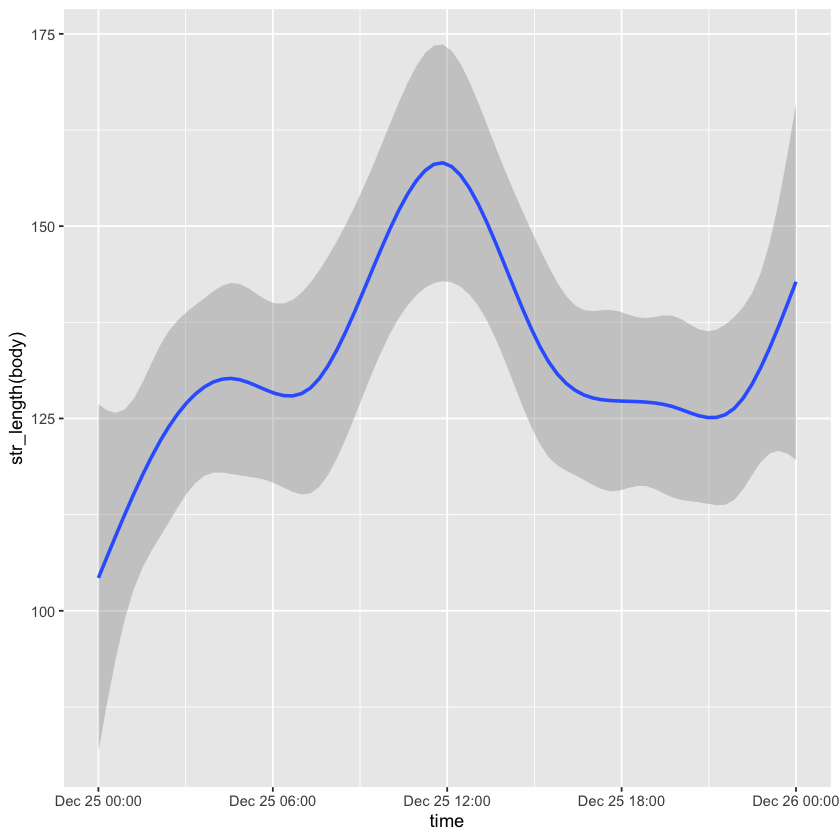

In [52]:
ggplot(posts_clean, aes(x=time, y=str_length(body))) + 
    geom_smooth()